In [77]:
import pandas as pd
import numpy as np
import chardet 

import seaborn as sns
from matplotlib import pyplot as plt

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

# Data Wrangling Assessment
### Data Cleaning

In [177]:
path = '/Users/sinasinai/Desktop/table_01_33_102020.xlsx'
df = pd.read_excel(path,engine='openpyxl',header=1,skipfooter=13)

In [178]:
df = df.rename(columns={'Unnamed: 0':'year'})
df = df.set_index('year')
df = df.transpose()

In [179]:
df = df.rename(columns={'Percent available for servicea':'Year-End Average Percentage Daily Availability',
                        'Average age (years)b':'Average Age - Years'}
              )

In [180]:
colmap = {0:[1,2],3:[4,5]}
rename_list = []

for key in colmap.keys():
    rename_list.append(df.columns[key])
    for stat in colmap[key]:
        rename_list.append(df.columns[key] + ' - ' + df.columns[stat])
        
df.columns = rename_list

In [181]:
df = df.drop(columns= ['Locomotives','Passenger and other train cars'])
df = df.replace('U','NaN').astype(float)

In [186]:
df.head()

,Locomotives - Year-End Average Percentage Daily Availability,Locomotives - Average Age - Years,Passenger and other train cars - Year-End Average Percentage Daily Availability,Passenger and other train cars - Average Age - Years
1972,NaN,22.3,NaN,22.0
1975,87.0,14.4,82.0,24.7
1980,83.0,7.4,77.0,14.3
1985,93.0,7.0,90.0,14.2
1990,84.0,12.0,90.0,20.0


### Data Joining

In [291]:
patha = '/Users/sinasinai/Desktop/dl1c.xls'
pathb = '/Users/sinasinai/Desktop/dl22.xls'
a = pd.read_excel(patha,header=13,skipfooter=2)
b = pd.read_excel(pathb,header=13,usecols="A:Q,T:AC")

In [292]:
# renaming these directly for ease of use

a.columns = [
    'STATE',
    'LICENSED DRIVERS - MALE',
    'LICENSED DRIVERS - MALE PCT OF TOTAL DRIVERS',
    'LICENSED DRIVERS - FEMALE',
    'LICENSED DRIVERS - FEMALE PCT OF TOTAL DRIVERS',
    'LICENSED DRIVERS - TOTAL DRIVERS',
    'RATIO - LICENSED DRIVERS TO PRIVATE AND COMMERCIAL MVS REGISTERED',
    'POPULATION - TOTAL RESIDENT',
    'POPULATION - DRIVING AGE 16+ - MALE',
    'POPULATION - DRIVING AGE 16+ - FEMALE',
    'POPULATION - DRIVING AGE 16+ - TOTAL',
    'DRIVERS - PER 1000 TOTAL RESIDENT POPULATION',
    'DRIVERS - PER 1000 DRIVING AGE POPULATION'
]

In [293]:
b.columns = [
    'STATE',
    'LICENSED MALE DRIVERS - 19 AND UNDER',
    'LICENSED MALE DRIVERS - 20 - 24',
    'LICENSED MALE DRIVERS - 25 - 29',
    'LICENSED MALE DRIVERS - 30 - 34',
    'LICENSED MALE DRIVERS - 35 - 39',
    'LICENSED MALE DRIVERS - 40 - 44',
    'LICENSED MALE DRIVERS - 45 - 49',
    'LICENSED MALE DRIVERS - 50 - 54',
    'LICENSED MALE DRIVERS - 55 - 59',
    'LICENSED MALE DRIVERS - 60 - 64',
    'LICENSED MALE DRIVERS - 65 - 69',
    'LICENSED MALE DRIVERS - 70 - 74',
    'LICENSED MALE DRIVERS - 75 - 79',
    'LICENSED MALE DRIVERS - 80 - 84',
    'LICENSED MALE DRIVERS - 85 AND OVER',
    'LICENSED MALE DRIVERS - TOTAL',
    'LICENSED YOUNG MALE DRIVERS - UNDER 16',
    'LICENSED YOUNG MALE DRIVERS - 16',
    'LICENSED YOUNG MALE DRIVERS - 17',
    'LICENSED YOUNG MALE DRIVERS - 18',
    'LICENSED YOUNG MALE DRIVERS - 19',
    'LICENSED YOUNG MALE DRIVERS - 20',
    'LICENSED YOUNG MALE DRIVERS - 21',
    'LICENSED YOUNG MALE DRIVERS - 22',
    'LICENSED YOUNG MALE DRIVERS - 23',
    'LICENSED YOUNG MALE DRIVERS - 24'
    
]

In [294]:
a.head()

,STATE,LICENSED DRIVERS - MALE,LICENSED DRIVERS - MALE PCT OF TOTAL DRIVERS,LICENSED DRIVERS - FEMALE,LICENSED DRIVERS - FEMALE PCT OF TOTAL DRIVERS,LICENSED DRIVERS - TOTAL DRIVERS,RATIO - LICENSED DRIVERS TO PRIVATE AND COMMERCIAL MVS REGISTERED,POPULATION - TOTAL RESIDENT,POPULATION - DRIVING AGE 16+ - MALE,POPULATION - DRIVING AGE 16+ - FEMALE,POPULATION - DRIVING AGE 16+ - TOTAL,DRIVERS - PER 1000 TOTAL RESIDENT POPULATION,DRIVERS - PER 1000 DRIVING AGE POPULATION
0,Alabama,1887023.0,48.62,1994519.0,51.38,3881542.0,0.729488,4849377,1850520,2018569,3869089,800.420755,1003.218587
1,Alaska 2/,250745.0,47.16,280999.0,52.84,531744.0,0.677566,736732,301326,268918,570244,721.760423,932.485041
2,Arizona,2453665.0,50.26,2428136.0,49.74,4881801.0,0.884340,6731484,2609768,2681353,5291121,725.219134,922.640212
3,Arkansas,1038874.0,49.19,1072999.0,50.81,2111873.0,0.773777,2966369,1136553,1202216,2338769,711.938737,902.984861
4,California,12562214.0,50.63,12251132.0,49.37,24813346.0,0.887987,38802500,15129276,15565575,30694851,639.478023,808.387895


In [295]:
b.head()

,STATE,LICENSED MALE DRIVERS - 19 AND UNDER,LICENSED MALE DRIVERS - 20 - 24,LICENSED MALE DRIVERS - 25 - 29,LICENSED MALE DRIVERS - 30 - 34,LICENSED MALE DRIVERS - 35 - 39,LICENSED MALE DRIVERS - 40 - 44,LICENSED MALE DRIVERS - 45 - 49,LICENSED MALE DRIVERS - 50 - 54,LICENSED MALE DRIVERS - 55 - 59,LICENSED MALE DRIVERS - 60 - 64,LICENSED MALE DRIVERS - 65 - 69,LICENSED MALE DRIVERS - 70 - 74,LICENSED MALE DRIVERS - 75 - 79,LICENSED MALE DRIVERS - 80 - 84,LICENSED MALE DRIVERS - 85 AND OVER,LICENSED MALE DRIVERS - TOTAL,LICENSED YOUNG MALE DRIVERS - UNDER 16,LICENSED YOUNG MALE DRIVERS - 16,LICENSED YOUNG MALE DRIVERS - 17,LICENSED YOUNG MALE DRIVERS - 18,LICENSED YOUNG MALE DRIVERS - 19,LICENSED YOUNG MALE DRIVERS - 20,LICENSED YOUNG MALE DRIVERS - 21,LICENSED YOUNG MALE DRIVERS - 22,LICENSED YOUNG MALE DRIVERS - 23,LICENSED YOUNG MALE DRIVERS - 24
0,Alabama,108101,168232.0,165330,152778,142642,153246,152732,167362,162836,143788,125217,92183,65310,45943,41323,1887023.0,0,23594,26233,28437,29837,31674,33078,33815,34241,35424.0
1,Alaska 2/,9893,22632.0,28185,27590,22809,21394,20951,23795,24005,19693,13396,8012,4187,2417,1786,250745.0,0,1268,2165,2916,3544,3959,3859,4379,4933,5502.0
2,Arizona,86800,190765.0,214721,230400,226520,236581,226224,232476,215084,190143,145608,106854,72653,46453,32383,2453665.0,0,10261,18893,26465,31181,34064,36645,38348,40481,41227.0
3,Arkansas,41944,88496.0,88882,87503,83362,85781,85243,95108,90627,81802,72868,55075,38275,24773,19135,1038874.0,0,5288,9690,12210,14756,16325,17614,17302,18230,19025.0
4,California,451549,1191309.0,1220965,1180988,1069849,1115486,1170370,1230526,1134255,940319,735602,475477,305385,196036,144098,12562214.0,0,33312,79717,143499,195021,214289,233646,243600,247281,252493.0


In [296]:
a['STATE'] = a['STATE'].replace(to_replace='[0-9]/',value='',regex=True).replace(' +$','',regex=True)
b['STATE'] = b['STATE'].replace(to_replace='[0-9]/',value='',regex=True).replace(' +$','',regex=True)

In [313]:
merged = a.merge(b,on='STATE',how='left')
merged = merged.set_index('STATE')
merged.head()

,LICENSED DRIVERS - MALE,LICENSED DRIVERS - MALE PCT OF TOTAL DRIVERS,LICENSED DRIVERS - FEMALE,LICENSED DRIVERS - FEMALE PCT OF TOTAL DRIVERS,LICENSED DRIVERS - TOTAL DRIVERS,RATIO - LICENSED DRIVERS TO PRIVATE AND COMMERCIAL MVS REGISTERED,POPULATION - TOTAL RESIDENT,POPULATION - DRIVING AGE 16+ - MALE,POPULATION - DRIVING AGE 16+ - FEMALE,POPULATION - DRIVING AGE 16+ - TOTAL,DRIVERS - PER 1000 TOTAL RESIDENT POPULATION,DRIVERS - PER 1000 DRIVING AGE POPULATION,LICENSED MALE DRIVERS - 19 AND UNDER,LICENSED MALE DRIVERS - 20 - 24,LICENSED MALE DRIVERS - 25 - 29,LICENSED MALE DRIVERS - 30 - 34,LICENSED MALE DRIVERS - 35 - 39,LICENSED MALE DRIVERS - 40 - 44,LICENSED MALE DRIVERS - 45 - 49,LICENSED MALE DRIVERS - 50 - 54,LICENSED MALE DRIVERS - 55 - 59,LICENSED MALE DRIVERS - 60 - 64,LICENSED MALE DRIVERS - 65 - 69,LICENSED MALE DRIVERS - 70 - 74,LICENSED MALE DRIVERS - 75 - 79,LICENSED MALE DRIVERS - 80 - 84,LICENSED MALE DRIVERS - 85 AND OVER,LICENSED MALE DRIVERS - TOTAL,LICENSED YOUNG MALE DRIVERS - UNDER 16,LICENSED YOUNG MALE DRIVERS - 16,LICENSED YOUNG MALE DRIVERS - 17,LICENSED YOUNG MALE DRIVERS - 18,LICENSED YOUNG MALE DRIVERS - 19,LICENSED YOUNG MALE DRIVERS - 20,LICENSED YOUNG MALE DRIVERS - 21,LICENSED YOUNG MALE DRIVERS - 22,LICENSED YOUNG MALE DRIVERS - 23,LICENSED YOUNG MALE DRIVERS - 24
STATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1887023.0,48.62,1994519.0,51.38,3881542.0,0.729488,4849377,1850520,2018569,3869089,800.420755,1003.218587,108101,168232.0,165330,152778,142642,153246,152732,167362,162836,143788,125217,92183,65310,45943,41323,1887023.0,0,23594,26233,28437,29837,31674,33078,33815,34241,35424.0
Alaska,250745.0,47.16,280999.0,52.84,531744.0,0.677566,736732,301326,268918,570244,721.760423,932.485041,9893,22632.0,28185,27590,22809,21394,20951,23795,24005,19693,13396,8012,4187,2417,1786,250745.0,0,1268,2165,2916,3544,3959,3859,4379,4933,5502.0
Arizona,2453665.0,50.26,2428136.0,49.74,4881801.0,0.884340,6731484,2609768,2681353,5291121,725.219134,922.640212,86800,190765.0,214721,230400,226520,236581,226224,232476,215084,190143,145608,106854,72653,46453,32383,2453665.0,0,10261,18893,26465,31181,34064,36645,38348,40481,41227.0
Arkansas,1038874.0,49.19,1072999.0,50.81,2111873.0,0.773777,2966369,1136553,1202216,2338769,711.938737,902.984861,41944,88496.0,88882,87503,83362,85781,85243,95108,90627,81802,72868,55075,38275,24773,19135,1038874.0,0,5288,9690,12210,14756,16325,17614,17302,18230,19025.0
California,12562214.0,50.63,12251132.0,49.37,24813346.0,0.887987,38802500,15129276,15565575,30694851,639.478023,808.387895,451549,1191309.0,1220965,1180988,1069849,1115486,1170370,1230526,1134255,940319,735602,475477,305385,196036,144098,12562214.0,0,33312,79717,143499,195021,214289,233646,243600,247281,252493.0


In [311]:
merged.shape

(52, 39)

# Study Design and Data Analysis Assessment

In [142]:
# The file encoding was weird, so I ended up using somthing besides utf-8
# I'm primarily analyzing the ACCIDENTS files

path2019 = '/Users/sinasinai/Desktop/FARS2019NationalCSV/accident.csv'
df2019 = pd.read_csv(path2019,encoding='latin-1')

path2018 = '/Users/sinasinai/Desktop/FARS2018NationalCSV/accident.csv'
df2018 = pd.read_csv(path2018,encoding='latin-1')

path2017 = '/Users/sinasinai/Desktop/FARS2017NationalCSV/accident.csv'
df2017 = pd.read_csv(path2017,encoding='latin-1')

path2016 = '/Users/sinasinai/Desktop/FARS2016NationalCSV/accident.csv'
df2016 = pd.read_csv(path2016,encoding='latin-1')

path2015 = '/Users/sinasinai/Desktop/FARS2015NationalCSV/accident.csv'
df2015 = pd.read_csv(path2015,encoding='latin-1')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (40,42,69) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [143]:
df2019 = df2019.loc[(df2019.STATE.isin([26,36])) & (df2019.CITY.isin([1260,4170]))]
df2018 = df2018.loc[(df2018.STATE.isin([26,36])) & (df2018.CITY.isin([1260,4170]))]
df2017 = df2017.loc[(df2017.STATE.isin([26,36])) & (df2017.CITY.isin([1260,4170]))]
df2016 = df2016.loc[(df2016.STATE.isin([26,36])) & (df2016.CITY.isin([1260,4170]))]
df2015 = df2015.loc[(df2015.STATE.isin([26,36])) & (df2015.CITY.isin([1260,4170]))]

In [144]:
df = pd.concat([df2015,df2016,df2017,df2018,df2019],join='inner')

In [145]:
df['CITYNAME'] = df.CITY.map({1260:'Detroit',4170:'New York City'})
df['YEAR'] = df.YEAR.astype(str)
# Filtering to accidents involving pedestrians (i.e. folks who weren't in motor vehicles at the time)
# All accidents appear to have at least one fatality, so no need to filter on Fatals
df = df.loc[df.PERNOTMVIT > 0]

In [146]:
accidents = df.groupby(['CITYNAME','YEAR']).count()['ST_CASE'].reset_index().rename(columns={'ST_CASE':'Accidents'})

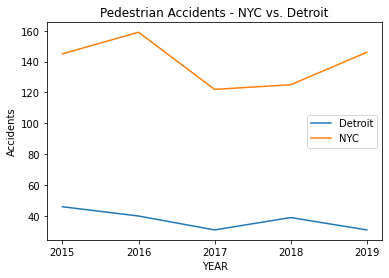

In [147]:
detroit = accidents.loc[accidents['CITYNAME'] == 'Detroit']
nyc = accidents.loc[accidents['CITYNAME'] == 'New York City']

f = sns.lineplot(x=detroit.YEAR,y=detroit.Accidents,label='Detroit')
sns.lineplot(x=nyc.YEAR,y=nyc.Accidents,label='NYC')

f.set_title('Pedestrian Accidents - NYC vs. Detroit')
plt.show()

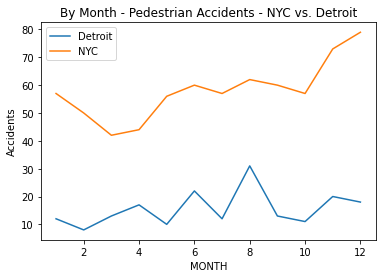

In [153]:
accidents = df.groupby(['CITYNAME','MONTH']).count()['ST_CASE'].reset_index().rename(columns={'ST_CASE':'Accidents'})

detroit = accidents.loc[accidents['CITYNAME'] == 'Detroit']
nyc = accidents.loc[accidents['CITYNAME'] == 'New York City']

f = sns.lineplot(x=detroit.MONTH,y=detroit.Accidents,label='Detroit')
sns.lineplot(x=nyc.MONTH,y=nyc.Accidents,label='NYC')

f.set_title('By Month - Pedestrian Accidents - NYC vs. Detroit')
plt.show()

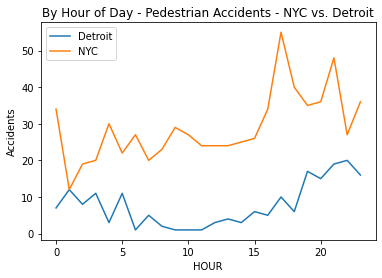

In [156]:
accidents = df.groupby(['CITYNAME','HOUR']).count()['ST_CASE'].reset_index().rename(columns={'ST_CASE':'Accidents'})

detroit = accidents.loc[accidents['CITYNAME'] == 'Detroit']
nyc = accidents.loc[accidents['CITYNAME'] == 'New York City']

f = sns.lineplot(x=detroit.HOUR,y=detroit.Accidents,label='Detroit')
sns.lineplot(x=nyc.HOUR,y=nyc.Accidents,label='NYC')

f.set_title('By Hour of Day - Pedestrian Accidents - NYC vs. Detroit')
plt.show()

In [159]:
df.loc['dfgroupby(['YEAR'])

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,CITYNAME
15108,26,260003,1,1,0,1,1,1,1,163,1260,3,1,2015,7,0,5,0,2,4,98,6,MT ELLIOT,OUTER DR,24,42.441008,-83.039150,0,8,0,0,3,2,0,1,2,1,0,1,0,0000000,99,99,99,99,99,99,0,0,0,1,0,Detroit
15132,26,260028,1,1,0,1,1,2,2,163,1260,31,1,2015,7,15,50,0,2,6,98,6,WATERMAN ST,NaN,14,42.314444,-83.115547,0,38,0,0,1,1,0,4,1,1,0,1,0,0000000,99,99,99,99,88,88,0,0,0,1,0,Detroit
15141,26,260037,1,1,0,1,1,1,1,163,1260,6,2,2015,6,22,15,1,2,1,1,1,I-94,NaN,354,42.413031,-82.943256,0,8,0,0,1,1,0,1,3,10,0,10,0,0000000,99,99,99,99,88,88,0,0,0,1,0,Detroit
15142,26,260038,1,1,0,2,2,1,1,163,1260,1,1,2015,5,9,45,1,2,3,98,3,SR-1 WOODWARD AVE,NaN,31,42.377117,-83.077881,0,43,0,0,1,1,0,4,1,1,0,1,0,0000000,99,99,99,99,99,99,0,0,0,1,1,Detroit
15150,26,260046,2,1,1,1,1,1,1,163,1260,10,1,2015,7,7,55,1,2,1,1,1,I-96,NaN,97,42.385433,-83.258389,0,8,0,0,1,1,0,2,1,4,11,4,0,0000000,99,99,99,99,99,99,19,0,0,1,0,Detroit


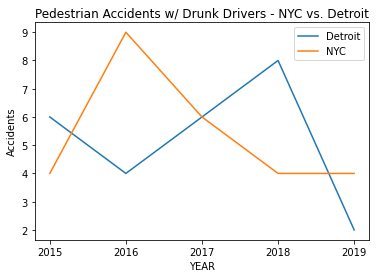

In [165]:
drunk = df.loc[df.DRUNK_DR > 0]
drunk = drunk.groupby(['CITYNAME','YEAR']).count()['ST_CASE'].reset_index().rename(columns={'ST_CASE':'Accidents'})

detroit = drunk.loc[drunk['CITYNAME'] == 'Detroit']
nyc = drunk.loc[drunk['CITYNAME'] == 'New York City']

f = sns.lineplot(x=detroit.YEAR,y=detroit.Accidents,label='Detroit')
sns.lineplot(x=nyc.YEAR,y=nyc.Accidents,label='NYC')

f.set_title('Pedestrian Accidents w/ Drunk Drivers - NYC vs. Detroit')
plt.show()

In [170]:
df.groupby(['CITYNAME','ROUTE']).count()['ST_CASE']/df.groupby(['CITYNAME']).count()['ST_CASE']

CITYNAME       ROUTE
Detroit        1        0.101604
               2        0.042781
               3        0.251337
               4        0.005348
               6        0.598930
New York City  1        0.044476
               2        0.012912
               3        0.054519
               5        0.007174
               6        0.873745
               7        0.005739
               9        0.001435
Name: ST_CASE, dtype: float64

In [171]:
df.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,CITYNAME
15108,26,260003,1,1,0,1,1,1,1,163,1260,3,1,2015,7,0,5,0,2,4,98,6,MT ELLIOT,OUTER DR,24,42.441008,-83.039150,0,8,0,0,3,2,0,1,2,1,0,1,0,0000000,99,99,99,99,99,99,0,0,0,1,0,Detroit
15132,26,260028,1,1,0,1,1,2,2,163,1260,31,1,2015,7,15,50,0,2,6,98,6,WATERMAN ST,NaN,14,42.314444,-83.115547,0,38,0,0,1,1,0,4,1,1,0,1,0,0000000,99,99,99,99,88,88,0,0,0,1,0,Detroit
15141,26,260037,1,1,0,1,1,1,1,163,1260,6,2,2015,6,22,15,1,2,1,1,1,I-94,NaN,354,42.413031,-82.943256,0,8,0,0,1,1,0,1,3,10,0,10,0,0000000,99,99,99,99,88,88,0,0,0,1,0,Detroit
15142,26,260038,1,1,0,2,2,1,1,163,1260,1,1,2015,5,9,45,1,2,3,98,3,SR-1 WOODWARD AVE,NaN,31,42.377117,-83.077881,0,43,0,0,1,1,0,4,1,1,0,1,0,0000000,99,99,99,99,99,99,0,0,0,1,1,Detroit
15150,26,260046,2,1,1,1,1,1,1,163,1260,10,1,2015,7,7,55,1,2,1,1,1,I-96,NaN,97,42.385433,-83.258389,0,8,0,0,1,1,0,2,1,4,11,4,0,0000000,99,99,99,99,99,99,19,0,0,1,0,Detroit
